# Generalized linear regression

In [1]:
# Import some graphical stuff
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Math and statistics
import numpy as np
from scipy import stats

## Data samples
Here we need to generate some data samples to test the algorithm

In [3]:
# It is left and right bounds of a interval [a, b]
# X values are distributed as R(a, b)
domain = [-100, 100]
x_values_distribution = stats.uniform(loc=domain[0], scale=(domain[1] - domain[0]))

In [4]:
x_values_1 = x_values_distribution.rvs(size=150, random_state=25)
x_values_2 = x_values_distribution.rvs(size=200, random_state=32)
x_values_3 = x_values_distribution.rvs(size=210, random_state=13)
x_values_4 = x_values_distribution.rvs(size=120, random_state=36)

Distribution of $X\_values$:

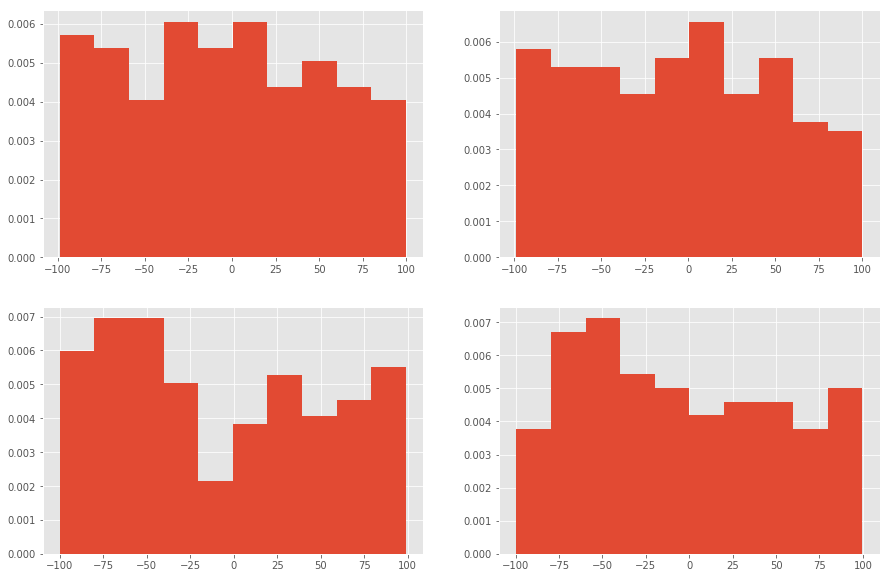

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.hist(x_values_1, density=True)
ax2.hist(x_values_2, density=True)
ax3.hist(x_values_3, density=True)
ax4.hist(x_values_4, density=True)
plt.show()

Y values will depend on X as:
- $Y_1 = \frac{19}{140250}X^3 + \frac{19}{9350}X^2 - \frac{172}{155}X + \frac{4038}{187} + \epsilon_1$
- $Y_2 = -\frac{381}{1456000}X^3 + \frac{439}{87360}X^2 - \frac{9917}{7280}X + \frac{775}{273} + \epsilon_2$
- $Y_3 = \frac{5}{14}X + \frac{130}{7} + \epsilon_3$
- $Y_4 = \frac{131}{31920}X^2 - \frac{121}{3192}X - \frac{3945}{266} + \epsilon_4$

where $\epsilon_1 \sim N(0, 8)$, $\epsilon_2 \sim N(0, 10)$, $\epsilon_3 \sim N(0, 6)$, $\epsilon_4 \sim N(0, 3)$

In [6]:
epsilon_distribution_1 = stats.norm(loc=0, scale=8)
epsilon_distribution_2 = stats.norm(loc=0, scale=10)
epsilon_distribution_3 = stats.norm(loc=0, scale=6)
epsilon_distribution_4 = stats.norm(loc=0, scale=3)

Y_1 = lambda x: \
    (19/140250) * x ** 3 + (19/9350) * x ** 2 - \
    (172/155) * x + (4038/187) + epsilon_distribution_1.rvs(size=1, random_state=abs(int(x)))

Y_2 = lambda x: \
    -(381/1456000) * x ** 3 + (439/87360) * x ** 2 + \
    (9917/7280) * x + (775/273) + epsilon_distribution_2.rvs(size=1, random_state=abs(int(x)))

Y_3 = lambda x: \
    (5/14) * x + (130/7) + epsilon_distribution_3.rvs(size=1, random_state=abs(int(x)))

Y_4 = lambda x: \
    (131/31920) * x ** 2 - (121/3192) * x - \
    (3945/266) + epsilon_distribution_4.rvs(size=1, random_state=abs(int(x)))

In [7]:
y_values_1 = list(map(Y_1, x_values_1))
y_values_2 = list(map(Y_2, x_values_2))
y_values_3 = list(map(Y_3, x_values_3))
y_values_4 = list(map(Y_4, x_values_4))

### Data visualization

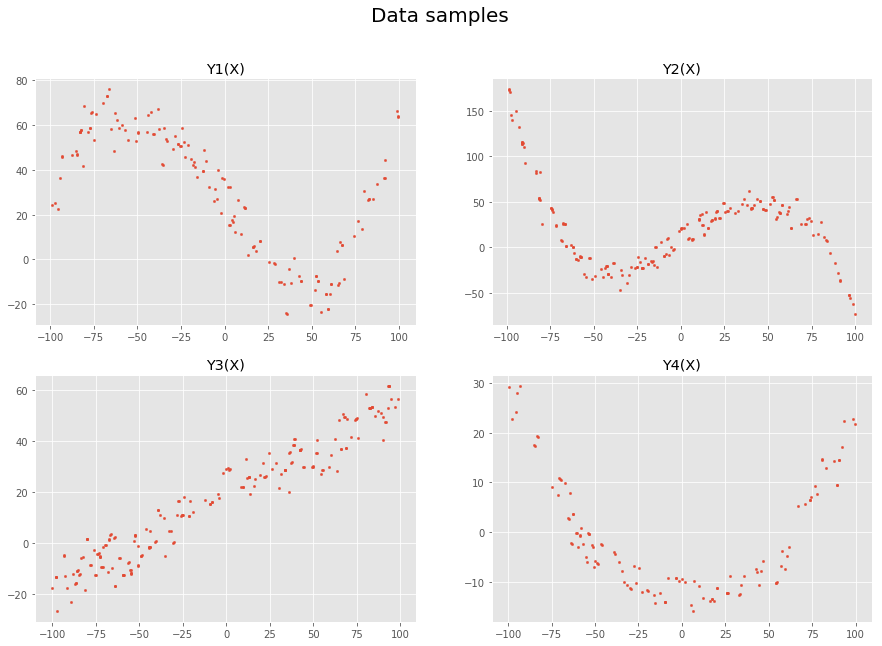

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Data samples', fontsize=20)
ax1.set_title("Y1(X)")
ax2.set_title("Y2(X)")
ax3.set_title("Y3(X)")
ax4.set_title("Y4(X)")

ax1.scatter(x_values_1, y_values_1, s=5)
ax2.scatter(x_values_2, y_values_2, s=5)
ax3.scatter(x_values_3, y_values_3, s=5)
ax4.scatter(x_values_4, y_values_4, s=5)

plt.show()

## Model testing

In [9]:
from MachineLearning.LinearRegression import LinearRegression
from MachineLearning.Preprocessing import train_test_split

In [10]:
x_domain = np.linspace(domain[0], domain[1], 1000)

In [11]:
model_1 = LinearRegression(degree=3)
model_2 = LinearRegression(degree=3)
model_3 = LinearRegression(degree=1)
model_4 = LinearRegression(degree=2)

In [12]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_values_1, y_values_1, random_seed=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_values_2, y_values_2, random_seed=0)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_values_3, y_values_3, random_seed=0)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_values_4, y_values_4, random_seed=0)

In [13]:
model_1.fit(x_train_1, y_train_1)
model_2.fit(x_train_2, y_train_2)
model_3.fit(x_train_3, y_train_3)
model_4.fit(x_train_4, y_train_4)

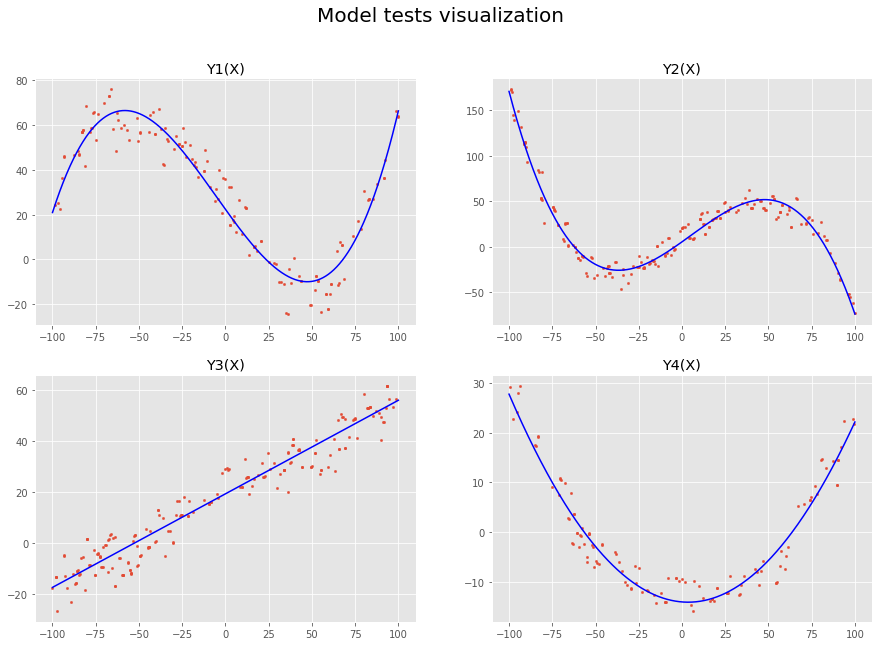

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Model tests visualization', fontsize=20)
ax1.set_title("Y1(X)")
ax2.set_title("Y2(X)")
ax3.set_title("Y3(X)")
ax4.set_title("Y4(X)")

ax1.scatter(x_values_1, y_values_1, s=5)
ax1.plot(x_domain, model_1.predict(x_domain), c='b')
ax2.scatter(x_values_2, y_values_2, s=5)
ax2.plot(x_domain, model_2.predict(x_domain), c='b')
ax3.scatter(x_values_3, y_values_3, s=5)
ax3.plot(x_domain, model_3.predict(x_domain), c='b')
ax4.scatter(x_values_4, y_values_4, s=5)
ax4.plot(x_domain, model_4.predict(x_domain), c='b')

plt.show()

## Quality assessment

Now we should make some assessment of model accuracy. For instance using MSE, RMSE and MAE metrics:
$$MSE = \frac{1}{n}\sum^n_{i=1} (Y_i - \hat Y_i)^2$$ $$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1} (Y_i - \hat Y_i)^2} = \sqrt{MSE}$$ $$MAE = \frac{1}{n}\sum^n_{i=1} |Y_i - \hat Y_i|$$

In [15]:
import pandas as pd

In [16]:
from MachineLearning.Metrics import (mean_squared_error,
                                     root_mean_squared_error,
                                     mean_absolute_error)

In [17]:
y_pred_1 = model_1.predict(x_test_1)
y_pred_2 = model_2.predict(x_test_2)
y_pred_3 = model_3.predict(x_test_3)
y_pred_4 = model_4.predict(x_test_4)

In [18]:
columns = ["Model", "MSE", "RMSE", "MAE"]

quality_1 = pd.Series(
    [
        "1",
        mean_squared_error(y_pred_1, y_test_1), 
        root_mean_squared_error(y_pred_1, y_test_1), 
        mean_absolute_error(y_pred_1, y_test_1)
    ], index=columns
)

quality_2 = pd.Series(
    [
        "2",
        mean_squared_error(y_pred_2, y_test_2), 
        root_mean_squared_error(y_pred_2, y_test_2), 
        mean_absolute_error(y_pred_2, y_test_2)
    ], index=columns
)

quality_3 = pd.Series(
    [
        "3",
        mean_squared_error(y_pred_3, y_test_3), 
        root_mean_squared_error(y_pred_3, y_test_3), 
        mean_absolute_error(y_pred_3, y_test_3)
    ], index=columns
)

quality_4 = pd.Series(
    [
        "4",
        mean_squared_error(y_pred_4, y_test_4), 
        root_mean_squared_error(y_pred_4, y_test_4), 
        mean_absolute_error(y_pred_4, y_test_4)
    ], index=columns
)

table = pd.DataFrame(
    [quality_1, quality_2, quality_3, quality_4], columns=columns
).set_index("Model")

In [19]:
display(table)

,MSE,RMSE,MAE
Model,,,
1,39.417017,6.278297,4.942512
2,75.516867,8.690044,7.143072
3,28.960130,5.381462,4.263567
4,9.023922,3.003984,2.394966
